In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

D:\miniconda\envs\torchenv\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'D:\miniconda\envs\torchenv\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
data = np.load("DK_time_series_for_new_loss.npy")
data = data[0] + data[3]

train = data[:10000]
test =  data[10000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

train_norm = torch.FloatTensor(train_norm).view(-1)
test_norm = torch.FloatTensor(test_norm).view(-1)

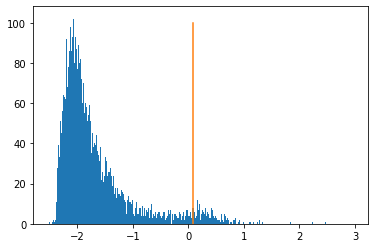

In [17]:
plt.hist(data, 1000)
plt.plot([mean + 2.6 * std] * 2, [0, 100])
plt.show()

In [18]:
e1 = mean + 2.6 * std
e2 = 2.2

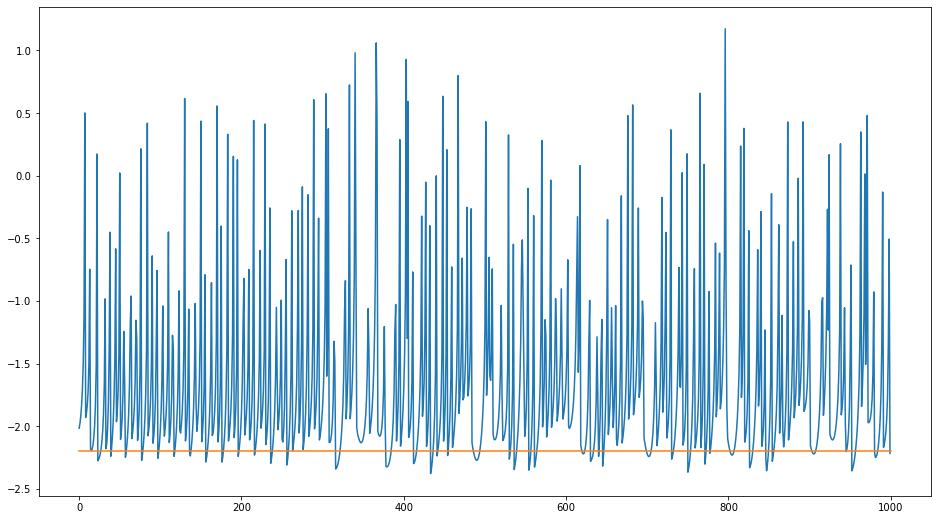

In [8]:
plt.figure(figsize=(16, 9))
plt.plot(data[:1000])
plt.plot([0, 1000], [-2.2] * 2)
plt.plot([0, 1000], [-2.2] * 2)

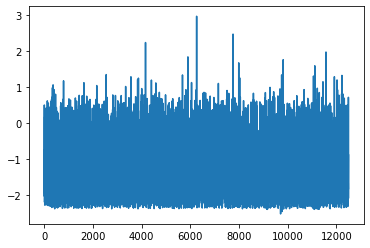

In [7]:
plt.plot(data)

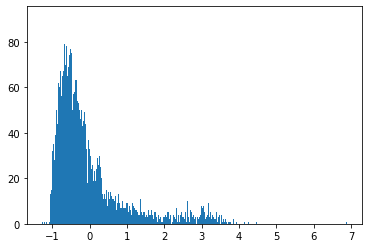

In [3]:
plt.hist(train_norm.numpy(), 1000)
plt.show()

In [26]:
mask = (data < - e2) * -1
mask += data > e1

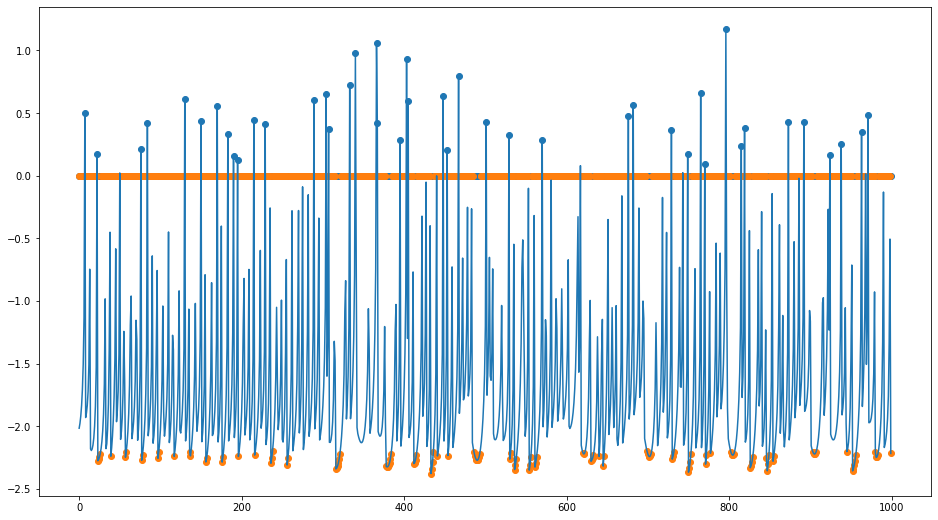

In [32]:
plt.figure(figsize=(16, 9))
plt.plot(data[:1000])
plt.scatter(np.arange(0, len(mask))[:1000], ((mask > 0) * data)[:1000])
plt.scatter(np.arange(0, len(mask))[:1000], ((mask < 0) * data)[:1000])

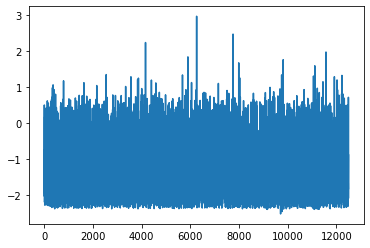

In [33]:
plt.plot(data)

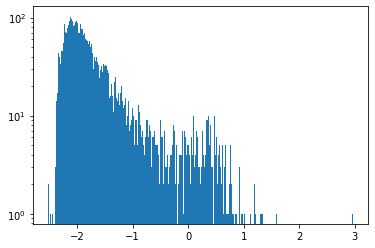

In [36]:
plt.hist(data, 1000)
plt.yscale('log')